# <a href="https://thetahat.ru/courses/bm-2024-aut"> Статистика ФБМФ </a>

In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")

## Задача 1
### Функция правдоподобия
Дана параметрическая модель и 3 выборки, состоящие из 2-3 наблюдений. Для удобства, выборки представлены в виде python-кода — каждая выборка записана как список ее элементов; множество выборок представлено как список списков, соответствующих выборкам из множества. Нужно для каждой выборки построить график функции правдоподобия.

*a).* Параметрическая модель $\mathcal{N}(\theta, 1)$, выборки: `[[-1, 1], [-5, 5], [-1, 5]]`

*b).* Параметрическая модель $Exp(\theta)$, выборки: `[[1, 2], [0.1, 1], [1, 10]]`

*c).* Параметрическая модель $U[0, \theta]$, выборки: `[[0.2, 0.8], [0.5, 1], [0.5, 1.3]]`

*d).* Параметрическая модель $Bin(5, \theta)$, выборки: `[[0, 1], [5, 5], [0, 5]]`

*e).* Параметрическая модель $Pois(\theta)$, выборки: `[[0, 1], [0, 10], [5, 10]]`

*f).* Параметрическая модель $Сauchy(\theta)$, где $\theta$ — параметр сдвига, выборки: `[[-0.5, 0.5], [-2, 2], [-4, 0, 4]]`

Выполнить задание, не создавая много кода, поможет следующая функция.

In [12]:
def draw_likelihood(density_function, grid, samples, label):
    """Изображает график функции правдоподобия для каждой из 3 выборок.

    Аргументы:
    density_function --- функция, считающая плотность (обычную или дискретную).
        На вход данная функция должна принимать массив размера (1, len_sample)
        и возвращать массив размера (len_grid, len_sample).
    grid --- массив размера (len_grid, 1) --- сетка для построения графика;
    samples --- три выборки;
    label --- latex-код параметрической модели.
    """
    assert len(samples) == 3, "Число выборок не равно 3."

    plt.figure(figsize=(18, 5))
    for i, sample in enumerate(samples):
        sample = np.array(sample)[np.newaxis, :]
        likelihood = np.prod(density_function(sample),axis = 1)
        

        plt.subplot(1, 3, i+1)
        plt.plot(grid, likelihood)
        plt.xlabel('$\\theta$', fontsize=16)
        plt.grid(ls=':')
        plt.title(label + ', sample=' + str(sample), fontsize=16)
    plt.show()

Первый пункт можно выполнить с помощью следующего кода:

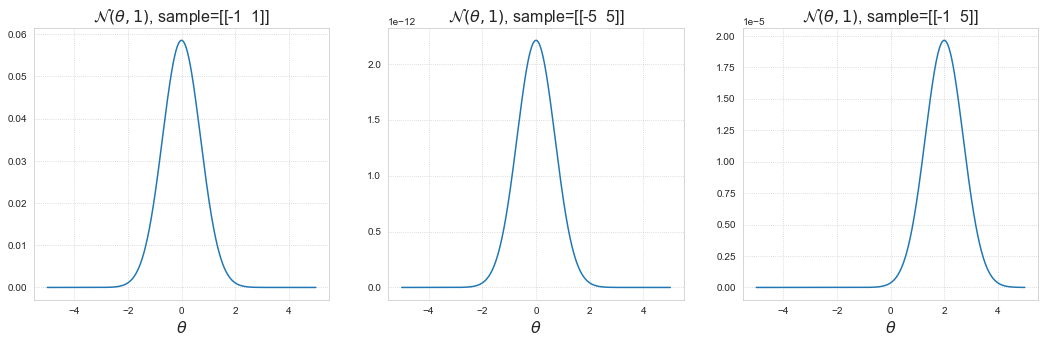

In [24]:
grid = np.linspace(-5, 5, 1000).reshape((-1, 1))
draw_likelihood(sps.norm(loc=grid).pdf, grid,
                [[-1, 1], [-5, 5], [-1, 5]], '$\\mathcal{N}(\\theta, 1)$')

Для нормального распределения значения функции правдоподобия характеризуютя слудующим образом:
- сдвиг происходит при смещении самой выборки
- масштаб с ростом выборки увеличивается
- форма не изменяется 
- максимум достигается один раз и с ростом выборки значение в максимуме увеличивается
- для симметричной выборки более правдоподобен параметр 0, для последней $\theta$ = 2

Выполните остальные:

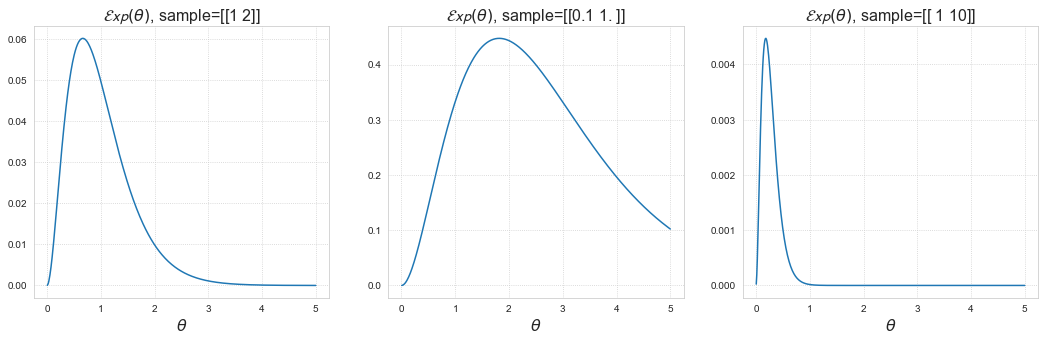

In [47]:
# ваш код

draw_likelihood(sps.expon(scale=1/grid).pdf, grid,
                [[1, 2], [0.1, 1], [1, 10]], '$\\mathcal{Exp}(\\theta)$')

Для экспоненциального распределения значения функции правдоподобия характеризуютя слудующим образом:
- сдвиг меняется при смещении выборки
- форма похожа, но изменяется ширина
- максимум достигается один раз и с ростом выборки значение в максимуме уменьшается
- для 1ой и 3ей выборки более правдоподобны параметры 0 < $\theta$ < 1, для 2ой 1 < $\theta$ < 2

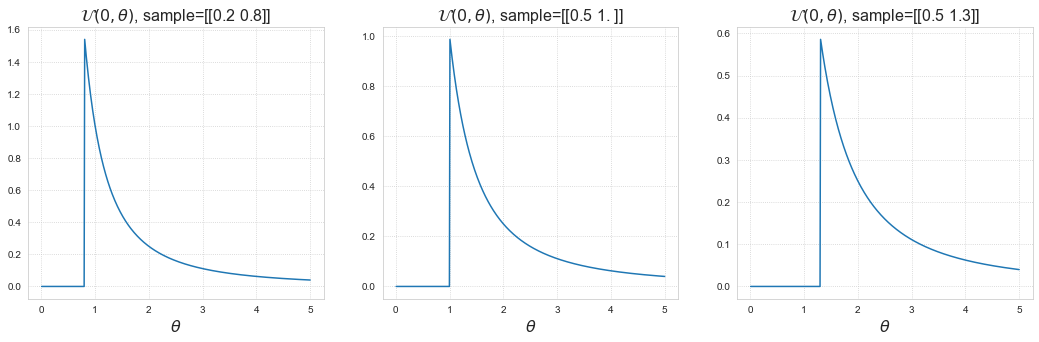

In [30]:
draw_likelihood(sps.uniform(scale=grid).pdf, grid,
                [[0.2, 0.8], [0.5, 1], [0.5, 1.3]], '$\\mathcal{U}(0, \\theta)$')

Для равномерного распределения значения функции правдоподобия характеризуютя слудующим образом:
- сдвиг меняется при смещении самой выборки
- масштаб с ростом выборки  и со смещением выборки уменьшается
- форма не изменяется 
- максимум достигается один раз и с ростом выборки значение в максимуме уменьшается
- для 1ой выборки более правдоподобен параметр $\theta$ < 1, для второй $\theta$ = 1, для последней $\theta$ > 1

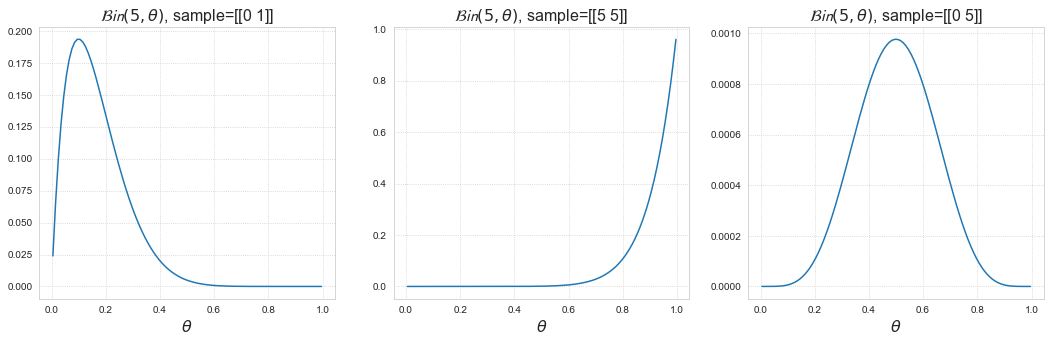

In [46]:
grid = np.linspace(-5, 5, 1000).reshape((-1, 1))
draw_likelihood(sps.binom(p=grid, n=5).pmf, grid,
                [[0, 1], [5, 5], [0, 5]], '$\\mathcal{Bin}(5, \\theta)$')

Для биномиального распределения значения функции правдоподобия характеризуютя слудующим образом:
- сдвиг меняется при увеличении выборки
- форма равзная для каждой выборки
- максимум достигается один раз и с ростом выборки значение в максимуме уменьшается
- для 1ой выборки более правдоподобен параметр 0.0 < $\theta$ < 0.2, для второй $\theta$ = 1, для последней $\theta$ = 0.5

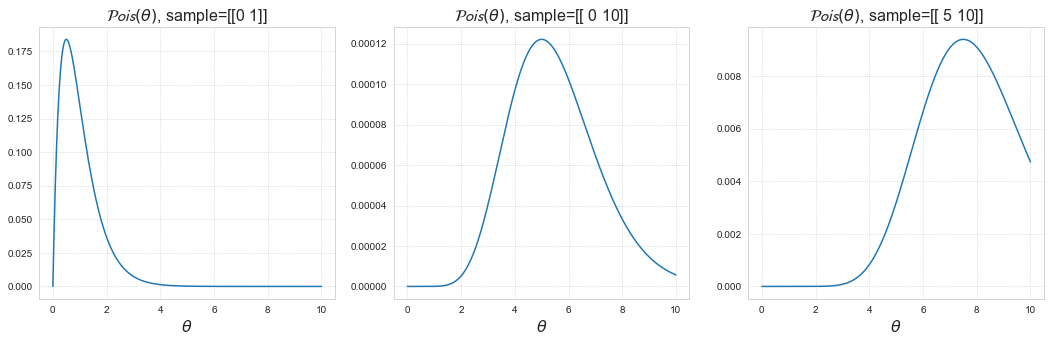

In [43]:
draw_likelihood(sps.poisson(mu=grid).pmf, grid,
                [[0, 1], [0, 10], [5, 10]], '$\\mathcal{Pois}(\\theta)$')

Для распределения Пуассона значения функции правдоподобия характеризуютя слудующим образом:
- сдвиг увеличивается при увеличении и смещении выборки
- форма похожа для каждой выборки
- максимум достигается один раз и с ростом выборки значение в максимуме уменьшается
- для 1ой выборки более правдоподобен параметр 0 < $\theta$ < 2, для второй $\theta$ = 5, для последней 6 < $\theta$ = 8

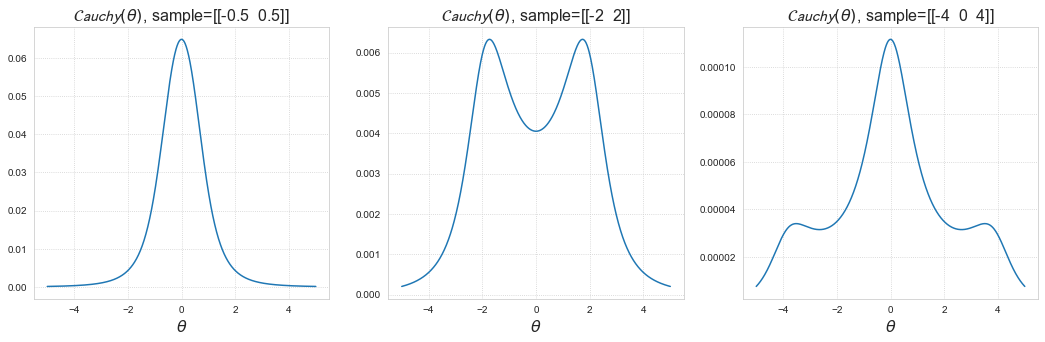

In [41]:
draw_likelihood(sps.cauchy(loc=grid).pdf, grid,
                [[-0.5, 0.5], [-2, 2], [-4, 0, 4]], '$\\mathcal{Cauchy}(\\theta)$')

Для распределения Коши значения функции правдоподобия характеризуютя слудующим образом:
- ФОРМА СИЛЬНО ОТЛИЧАЕТСЯ ОТ ПРОШЛЫХ РАПРЕДЕЛЕНИЙ
- максимум достигается один раз только при самой маленькой выборке, с ростом выборки количество экстремумов увеличивается
- для 1ой выборки более правдоподобен параметр $\theta$ = 0, для второй два варианта, для последней $\theta$ = 0
- при анализе с помощью производной надо будет обращать внимание на значения в экстремумов - максимизация функции будет не в каждом случае

Прокомментируйте полученные графики. Сделайте вывод о том, как функция правдоподобия для каждой модели зависит от выборки. Является ли функция правдоподобия плотностью?

*Примечание:* В выводе для каждой модели требуется описать, как меняются значения функции (сдвиг, масштаб, форма) при изменении выборки, где достигается максимум, а также какие значения параметра более правдоподобны для данной выборки, какие — менее.

**Вывод:** Написала для каждого распределения. Особый интерес представляет распределение Коши

Сгенерируем выборку большого размера из стандартного нормального распределения и посчитаем ее функцию правдоподобия в модели $\mathcal{N}(\theta, 1)$. Выполните код ниже:

In [49]:
sample = sps.norm.rvs(size=10**5)
likelihood = sps.norm.pdf(sample).prod()
print(likelihood)

0.0


Почему результат отличается от ожидаемого? Как обойти эту неприятность для подсчета оценки максимального правдоподобия? Реализуйте это.

*Подсказка:* нужно использовать некоторый метод класса, реализующий это распределение

**Ответ на вопрос и описание метода решения проблемы:**


In [150]:
# ваш код
sample = sps.norm.rvs(size=10**5)
lg_likelihood = np.sum(sps.norm.logpdf(sample))
likelihood = 2.71**lg_likelihood
print(likelihood)

0.0


## Задача 2

### Распределение Коши и ОМП
Предлагается изучить некоторые свойства распределения Коши с параметром сдвига $\theta$, обладающего плотностью распределения $p_{\theta}(x) = \frac{1}{\pi (1 + (x- \theta)^2)}$.

За распределение Коши отвечает класс <a target="_black" href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cauchy.html">`scipy.stats.cauchy`</a>.



**1.** Визуализируйте на одном графики плотности  стандартного нормального распределения и стандартного распределения Коши (т.е. $\theta = 0$). Что можно сказать?


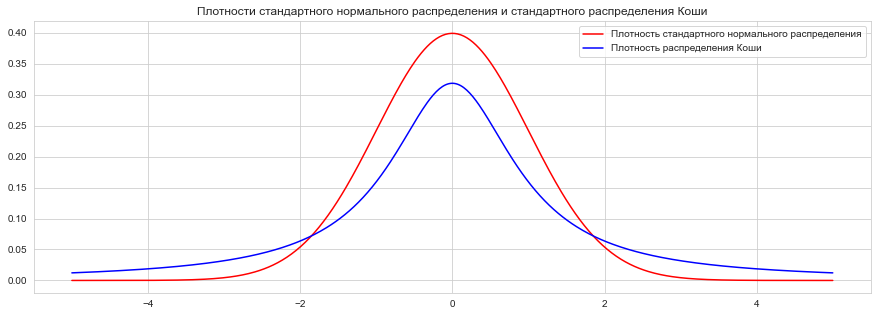

In [55]:
# ваш код
plt.figure(figsize=(15, 5))
plt.title("Плотности стандартного нормального распределения и стандартного распределения Коши")
grid = np.linspace(-5, 5, 500)
plt.plot(grid, sps.norm.pdf(grid), color='red', label='Плотность стандартного нормального распределения')
plt.plot(grid, sps.cauchy.pdf(grid), color='blue', label='Плотность распределения Коши')
plt.legend()

plt.show()

**Ответ**

Плотность распределения для Коши характеризуется меньшим значением в максимуме, чем у нормального. И хвосты у Коши более тяжёлые, поэтому большие числа будут легче генерироваться - отсюда мы и получали два пика в прошлом задании

**2.** Повторите эксперимент с <a href="https://thetahat.ru/courses/bm-2024-aut/main/2/seminar_2">семинара 2</a> про закон больших чисел для распределения Коши. Выполняется ли закон? 

In [60]:
# ваш код
size = 1000
samples_count = 500

sample = sps.cauchy.rvs(size=(samples_count, size))
means = sample.cumsum(axis=1) / (np.arange(size) + 1)

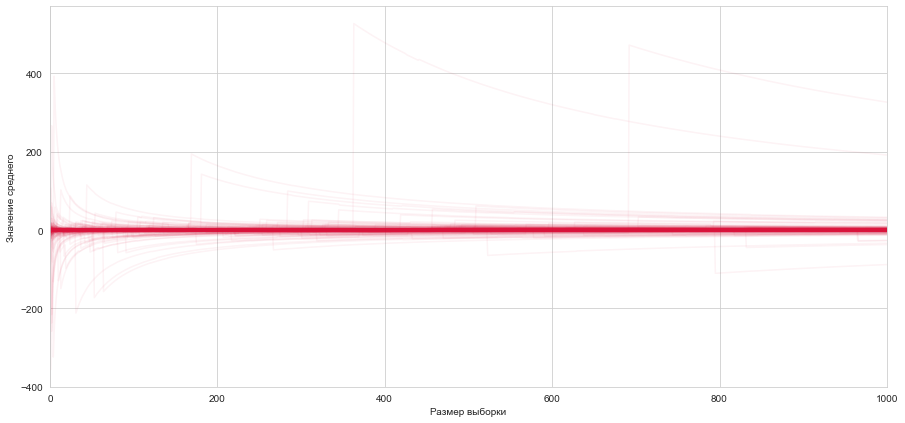

In [68]:
plt.figure(figsize=(15, 7))
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, means[i], color='crimson', alpha=0.05)
plt.xlabel('Размер выборки')
plt.ylabel('Значение среднего')
plt.xlim((0, size));


**Ответ**

Не выполняется, так как при увеличении выборки у нас всё-равно есть значения, которые находятся достаточно далеко - это видно из графика. А из теории это объяснялось на лекции, где $<X>$ = $X_1$

**3.** Аналогичным образом проведите эксперимент по изучению зависимости *выборочной* медианы от размера выборки. Медиану по выборке можно посчитать с помощью <a target="_blank" href="https://numpy.org/doc/stable/reference/generated/numpy.median.html">`np.median`</a>.

C:\Users\natal\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\natal\anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


(-5.0, 5.0)

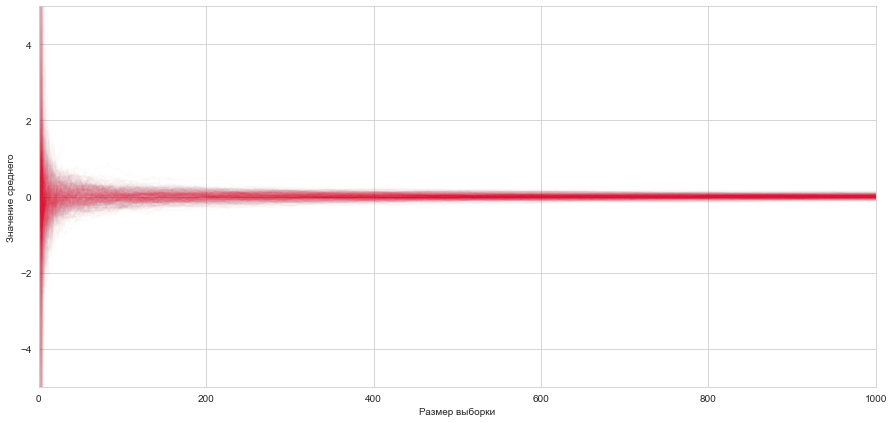

In [70]:
# ваш код
med = np.array([np.median(sample[:, :i], axis=1) for i in range(size)])
plt.figure(figsize=(15, 7))
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, med[:, i], color='crimson', alpha=0.01)
plt.xlabel('Размер выборки')
plt.ylabel('Значение среднего')
plt.xlim((0, size))
plt.ylim((-5, 5))

**Вывод**

С использованием оценки в виде медианы теперь закон больших чисел выполняется для распределения Коши

**4.** Сгенерируйте выборку $X = \left(X_1, \dots, X_{1000} \right)$ из стандартного распределения Коши. Для всех $n \leqslant 1000$ по первым $n$ элементам выборки $X_1, \dots, X_n$ вычислите значения следующих оценок:
- $\overline{X}$  —  выборочное среднее;
- $\overline{X}_{\alpha}$ —  усеченное среднее, где $\alpha$ &mdash; значение, на котором достигается минимум $\sigma^2_{\alpha}$;
- $\widehat{\mu}$ —  выборочная медиана.

Также, по каждой из этих оценок, вычислите одношаговую оценку.

**Напоминание:** если $\widehat{\theta}_0$ — асимптотически нормальная оценка, то одношаговая оценка $\widehat{\theta}_1$ вычисляется как $\widehat{\theta}_1 = \widehat{\theta}_0 - \left(l''_X(\widehat{\theta}_0) \right)^{-1} l'_X(\widehat{\theta}_0)$, где $l_X(\theta)$ — логарифмическая функция правдоподобия. *Заметим, что обычное выборочное среднее не является асимптотически нормальной оценкой, и оценка, вычисленная по формуле выше, формально не является одношаговой, однако ее все равно требуется посчитать.*



In [121]:
def cauchy_one_step_estimation(sample, init_estimation):
    """Вычисляет одношаговую оценку параметра сдвига распределения Коши.
    
    Аргументы:
        sample -- numpy-массив вещественных чисел; выборка, по которой
            вычисляется одношаговая оценка.
        init_estimation -- вещественное число; асимптотически нормальная оценка,
            по которой вычисляется одношаговая.
    """
    d1 = np.sum(2 * (sample - init_estimation) / (1 + (sample - init_estimation)**2))
    d2 =  -np.sum(2 * (1 - (sample - init_estimation)**2) / (1 + (sample - init_estimation)**2)**2)
    one_step_estimation = init_estimation + d1 / d2
    return one_step_estimation

In [147]:
size = 1000
n = np.arange(1, size + 1)
sample = sps.cauchy(loc=0, scale=1).rvs(size=(size))
avg_estimation = np.array([np.mean(sample[:i]) for i in n])
med_estimation = np.array([np.median(sample[:i]) for i in n])
onestep_med_estimation = np.array([cauchy_one_step_estimation(sample[:i], med_estimation[i-1]) for i in n])
onestep_avg_estimation = np.array([cauchy_one_step_estimation(sample[:i], avg_estimation[i-1]) for i in n])

На одном графике изобразите зависимость значений этих оценок от $n$. Для каждой оценки $\widehat{\theta}_0$ соответствующая оценка $\widehat{\theta}_1$ должна быть изображена на графике пунктиром тем же цветом, что и $\widehat{\theta}_0$.

Сравните асимптотические дисперсии оценок. Сделайте вывод.

**Замечание:** если некоторые оценки имеют большой разброс, и разница между графиками зависимостей оценок с малыми значениями недостаточно заметна, стоит сделать два графика, на одном из которых будут изображены все оценки, а на втором &mdash; только достаточно хорошие.

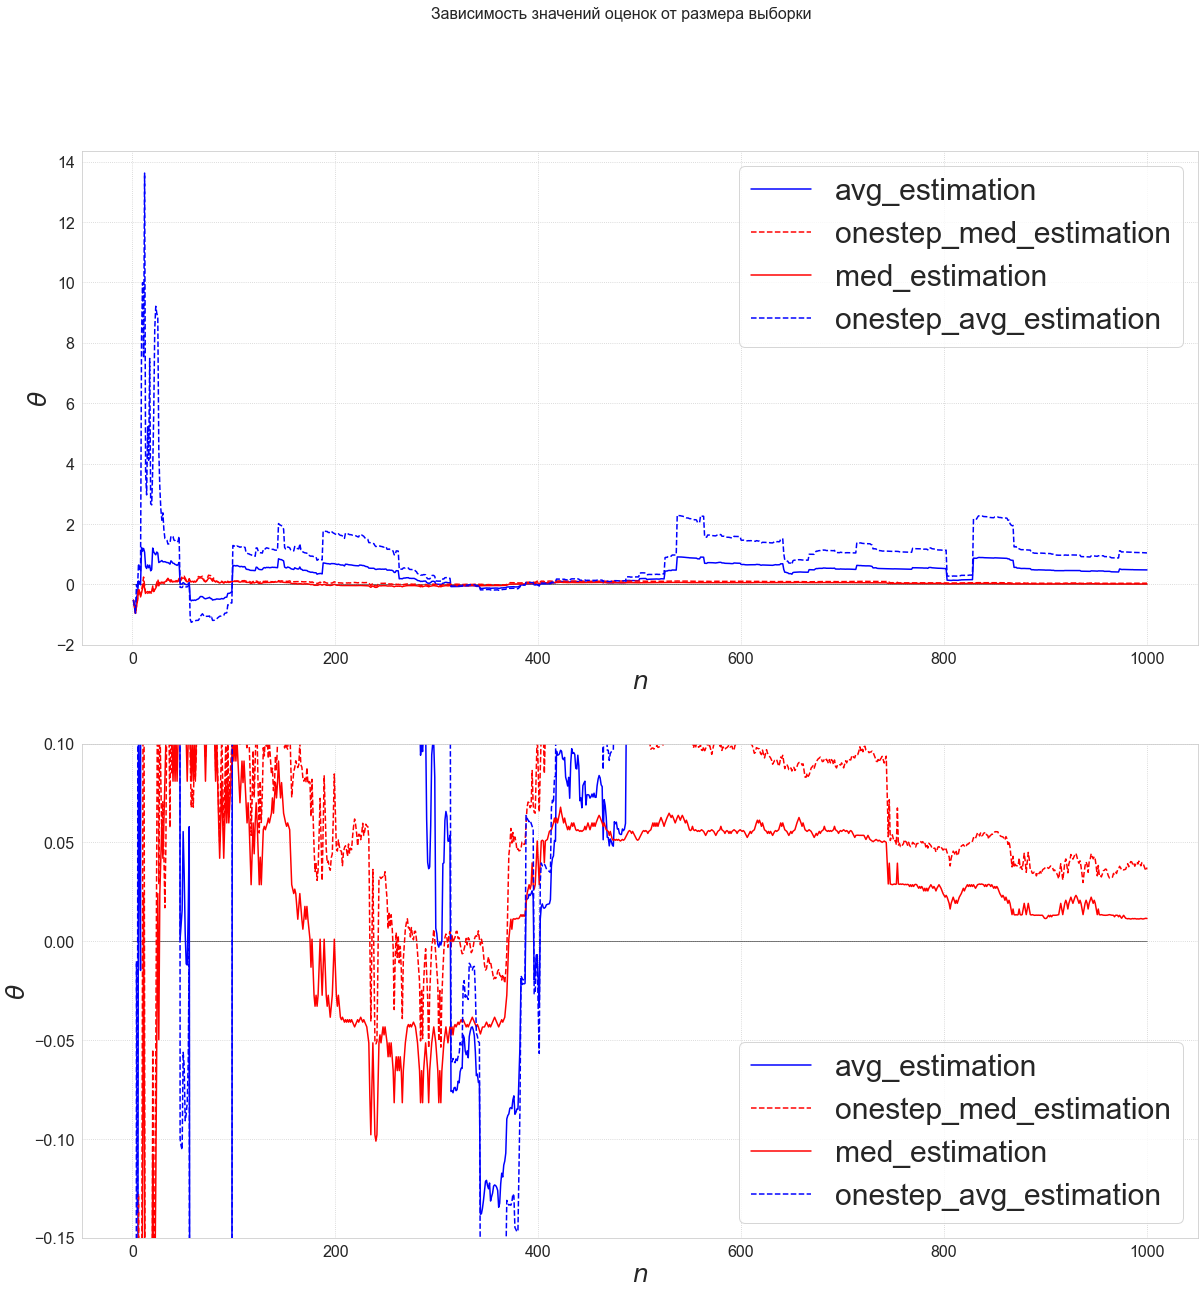

In [148]:
# метки дл каждой оценки
labels = ['$\overline{X}$', '$\widehat{\mu}$', 'one step on $\widehat{\mu}$']


plt.figure(figsize=(20, 20))

for i, ylim in zip([1, 2], [None, (-0.15, 0.1)]):
    plt.subplot(2, 1, i)
    plt.plot(n, avg_estimation, label = 'avg_estimation', color ='blue')
    plt.plot(n, onestep_med_estimation, label = 'onestep_med_estimation', color ='red', linestyle='dashed')
    plt.plot(n, med_estimation, label = 'med_estimation',color ='red')
    plt.plot(n, onestep_avg_estimation, label = 'onestep_avg_estimation', color ='blue', linestyle='dashed')
    plt.xlabel('$n$', fontsize=25)
    plt.ylabel('$\\theta$', fontsize=25)
    
    plt.hlines(0, 0, size, color='black', lw=0.5)
    plt.legend(fontsize=30)
    plt.grid(ls=':')
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.ylim(ylim)

plt.suptitle('Зависимость значений оценок от размера выборки', fontsize=16)

plt.show()

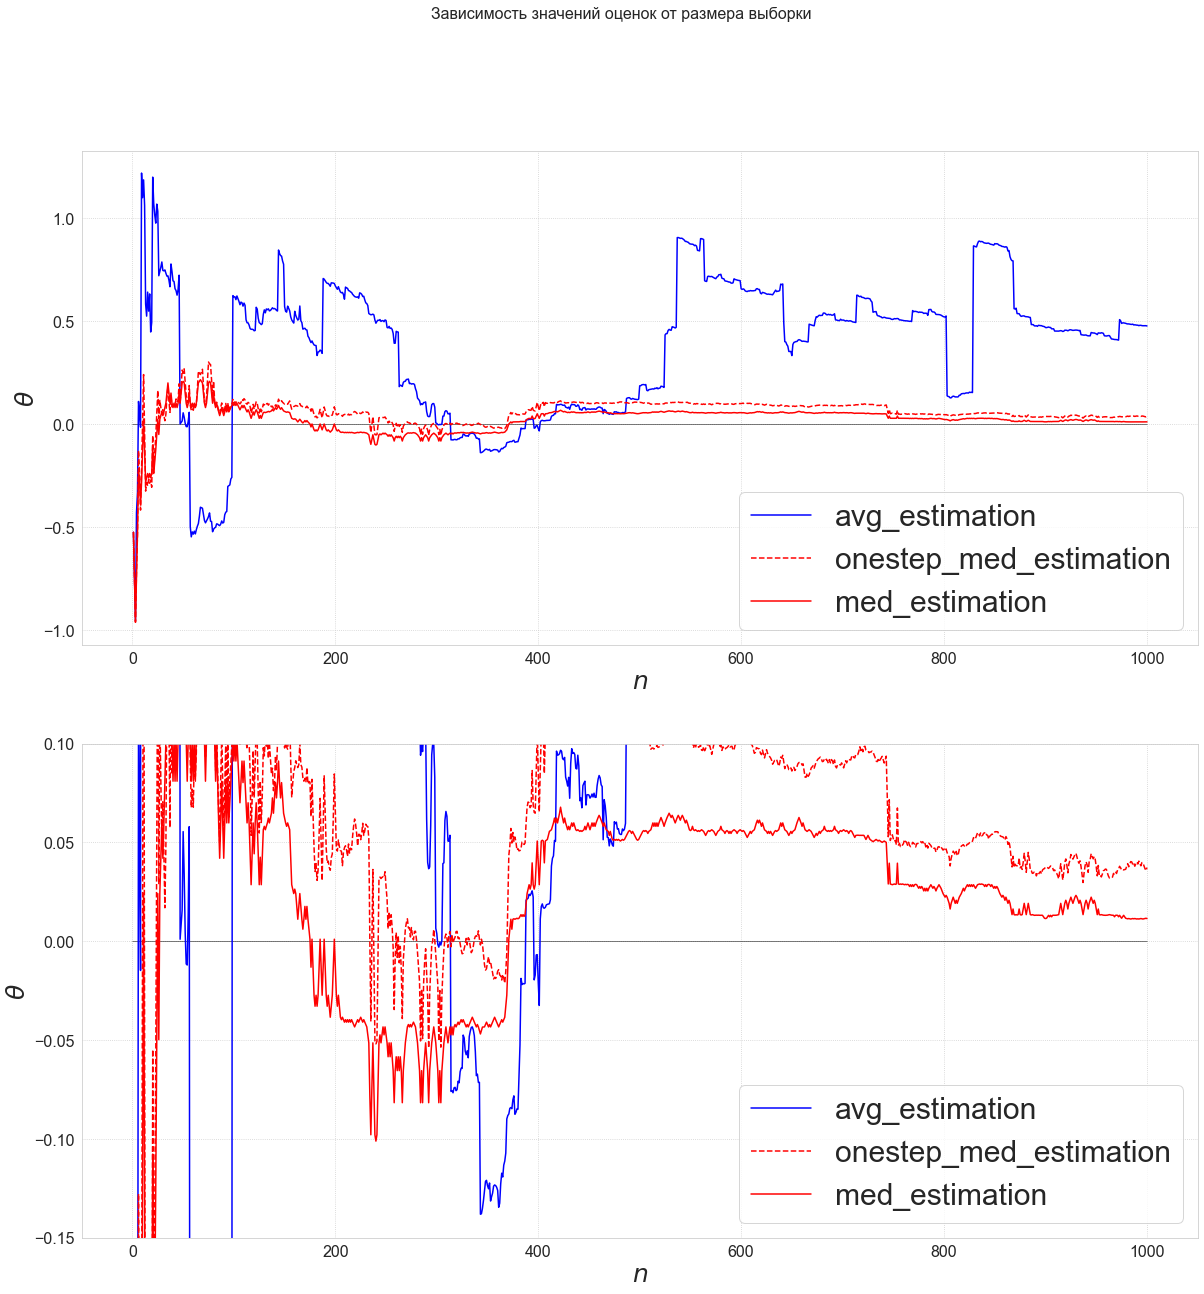

In [149]:
# а теперь только для достаточно хороших оценок
plt.figure(figsize=(20, 20))
for i, ylim in zip([1, 2], [None, (-0.15, 0.1)]):
    plt.subplot(2, 1, i)
    plt.plot(n, avg_estimation, label = 'avg_estimation', color ='blue')
    plt.plot(n, onestep_med_estimation, label = 'onestep_med_estimation', color ='red', linestyle='dashed')
    plt.plot(n, med_estimation, label = 'med_estimation',color ='red')
    #plt.plot(n, onestep_avg_estimation, label = 'onestep_avg_estimation', color ='blue', linestyle='dashed')
    plt.xlabel('$n$', fontsize=25)
    plt.ylabel('$\\theta$', fontsize=25)
    
    plt.hlines(0, 0, size, color='black', lw=0.5)
    plt.legend(fontsize=30)
    plt.grid(ls=':')
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.ylim(ylim)

plt.suptitle('Зависимость значений оценок от размера выборки', fontsize=16)

plt.show()

Не забудьте про выводы:

Отчётливо видно, что асимптотическая дисперсия для выборочного среднего очень велика. Это связано с тем, что для распределения Коши характерны более тяжёлые хвосты, то есть достаточно большие значения будут генерироваться легче и разброс для среднего увеличится.